# Clone Repo

In [4]:
!git clone https://github.com/ManteshE/handwritten-digit-recognition.git

%cd handwritten-digit-recognition

!git config --global user.name "Mantesh Eksambe"
!git config --global user.email "mantesh.eksambe.cse@gmail.com"

Cloning into 'handwritten-digit-recognition'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 115 (delta 33), reused 67 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 1.31 MiB | 7.79 MiB/s, done.
Resolving deltas: 100% (33/33), done.
/content/handwritten-digit-recognition


# Execute Example Using Pre-trained Model

Resolved Model Path: /content/handwritten-digit-recognition/tf-cnn-model.h5
Resolved Image Path: /content/handwritten-digit-recognition/assets/images/1a.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Digit: 1


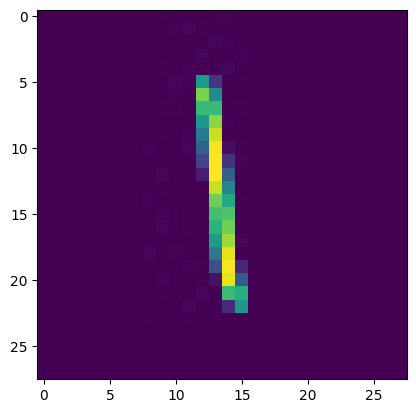

In [9]:
import os
import cv2
import sys
import numpy as np
import logging
from tensorflow.keras import models
import argparse
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

# Set paths relative to the notebook's working directory
MODEL_PATH = "tf-cnn-model.h5"
DEFAULT_IMAGE_PATH = "assets/images/1a.jpg"

# Ensure the paths are correct
MODEL_PATH =  os.path.abspath(MODEL_PATH) # "/content/handwritten-digit-recognition/tf-cnn-model.h5"
DEFAULT_IMAGE_PATH = os.path.abspath(DEFAULT_IMAGE_PATH) # "/content/handwritten-digit-recognition/assets/images/1a.jpg"

def predict_digit(image_path):
    try:
        logging.debug("Loading model from: %s", MODEL_PATH)
        model = models.load_model(MODEL_PATH)
        logging.info("Model loaded successfully.")
    except Exception as e:
        logging.error("Failed to load model: %s", e)
        raise

    try:
        logging.debug("Loading image from: %s", image_path)
        image = cv2.imread(image_path, 0)  # Read as grayscale
        if image is None:
            raise FileNotFoundError("Image could not be loaded. Check the file path.")

        logging.info("Image loaded successfully. Shape: %s", image.shape)
        image_resized = cv2.resize(image, (28, 28))
        image_reshaped = image_resized.reshape(1, 28, 28, 1)
        pred = np.argmax(model.predict(image_reshaped), axis=-1)
        logging.info("Prediction successful. Predicted digit: %s", pred[0])
        plt.imshow(image_resized)
        return pred[0]
    except Exception as e:
        logging.error("Error during prediction: %s", e)
        raise

def main(image_path):
    """
    Main function to predict the digit in the image provided via CLI.
    """
    logging.debug("Starting main function with image_path: %s", image_path)
    try:
        predicted_digit = predict_digit(image_path)
        logging.info("Predicted Digit: %s", predicted_digit)
        print("Predicted Digit: {}".format(predicted_digit))
    except FileNotFoundError:
        logging.error("[ERROR]: Image not found at %s", image_path)
        print("[ERROR]: Image not found.")
    except Exception as e:
        logging.error("[ERROR]: Unexpected error: %s", e)
        print("[ERROR]: Unexpected error occurred. Check logs for details.")

if __name__ == "__main__":
    print("Resolved Model Path:", MODEL_PATH)
    print("Resolved Image Path:", DEFAULT_IMAGE_PATH)

    try:
        if len(sys.argv) < 2 or not os.path.isfile(sys.argv[1]):
            logging.warning("No valid image path provided. Using default image path.")
            main(DEFAULT_IMAGE_PATH)
        else:
            main(sys.argv[1])
    except Exception as e:
        logging.error("Script terminated due to an error: %s", e)